## Lesson-01

In [116]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [117]:
simple_grammar

'\nsentence => noun_phrase verb_phrase\nnoun_phrase => Article Adj* noun\nAdj* => null | Adj Adj*\nverb_phrase => verb noun_phrase\nArticle =>  一个 | 这个\nnoun =>   女人 |  篮球 | 桌子 | 小猫\nverb => 看着   |  坐在 |  听着 | 看见\nAdj =>  蓝色的 | 好看的 | 小小的\n'

In [118]:
another_grammar = """
# 
"""

In [119]:
import random

In [120]:
def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [121]:
adj_star()

''

## But the question is ? 

如果我们更换了语法，会发现所有写过的程序，都要重新写。:( 

In [122]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [123]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [124]:
grammar = create_grammar(adj_grammar)

In [125]:
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [126]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [127]:
example_grammar = create_grammar(simple_grammar)

In [128]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [129]:
generate(gram=example_grammar, target='sentence')

'一个蓝色的小猫看见这个蓝色的桌子'

In [130]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [131]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

小朋友,您好我是9号,您需要赌博吗？
您好我是92号,您需要打猎吗？
您好我是6号,请问你要喝酒吗？
女士,你好我是5号,请问你要喝酒吗？
小朋友,您好我是6号,请问你要打猎吗？
您好我是7854948号,请问你要打猎吗？
您好我是8455号,请问你要喝酒吗？
你好我是4号,请问你要打牌吗？
小朋友,你好我是1号,请问你要喝酒吗？
您好我是7号,请问你要喝酒吗？
您好我是31号,请问你要赌博吗？
你好我是155号,请问你要打猎吗？
小朋友,您好我是27号,您需要赌博吗？
女士,您好我是2号,请问你要喝酒吗？
小朋友,您好我是56号,请问你要打牌吗？
你好我是66号,您需要打猎吗？
先生,你好我是7号,请问你要打牌吗？
你好我是57号,您需要赌博吗？
女士,你好我是98号,您需要打猎吗？
先生,您好我是2号,您需要打牌吗？


希望能够生成最合理的一句话？ 

## Data Driven

我们的目标是，希望能做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

In [17]:
simpel_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line } | if ( cond )  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''

In [18]:
print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

lib=student


In [19]:
def pretty_print(line):
    # utility tool function
    lines = line.split('/N')
    
    code_lines = []
    
    for i, sen in enumerate(lines):
        if i < len(lines) / 2: 
            #print()
            code_lines.append(i * "  " + sen)
        else:
            code_lines.append((len(lines) - i) * " " + sen)
    
    return code_lines

In [20]:
generated_programming = []

for i in range(20):
    generated_programming += pretty_print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

In [21]:
for line in generated_programming:
    print(line)

lib_student_0_1=student_info
while(student_student_4_6_6>=lib_name_6){
  if(info_database==lib_database_database_1){
    if(student_studentstudent){
      if(name_name_8_5_2>=lib_info_5_8){
        name=database_info
          }
            }
      }else{
     if(student_name_student>=database_student_database_6){
    name=info
   }
  }
 }
lib=student
if(database_database_5_9_8==name_8){
  if(name==info_lib_5){
    if(info_lib_name_5_4_2_5_8>=lib_name_student_student_info_9_1){
      if(name_9_0<database_student_3_6){
        if(database_6_3_5_1<=info_5){
          database_0=name_1_2_8_5_2_5_0
            }else{
              if(student<name_name){
                if(student_database>=name_8){
                  if(name_9>=database_student_name_9_7){
                    database_name_9=lib
                      }
                        }
                          }
                            }
              }else{
             if(database_6>=info_8){
            info_lib_9_9=lib
    

# Language Model

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

In [57]:
import random

In [58]:
random.choice(range(100))

45

In [59]:
filename = './sqlResult_1558435.csv'

In [60]:
import pandas as pd

In [61]:
content = pd.read_csv(filename, encoding='gb18030')

In [62]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [63]:
articles = content['content'].tolist()

In [64]:
content['content']

0        此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1        骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
2        此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...
3          这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n
4        （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...
5        　　受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...
6        虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...
7        　　沙漠雄鹰：震荡有利消化套牢筹码\r\n　　周四开盘上证50在银行券商大蓝筹带动下一度涨近...
8        （原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...
9        　　6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...
10       　　证券时报网（www.stcn.com）06月23日讯\r\n　　据上证报道，6月初以来，...
11       ?\r\n　　巨丰早评：市场将再次探底\r\n　　【巨丰观点】\r\n　　周四大盘冲高回落，...
12       中新网6月19日电 据外媒报道，美国底特律一名男子1976年因为一根头发被定谋杀罪，监禁41...
13       　　曹先生：风格转换前的阵痛\r\n　　今日早盘两地低开，之后一度震荡走高，领涨的仍然是上证...
14       6月21日，MSCI在官网发布公告称，从明年6月起将中国A股纳入MSCI新兴市场指数和MSC...
15       　　中国证券网讯（记者 费天元）沪深两市周五临近午盘出现快速跳水，沪指连续跌穿5日、10日及...
16       九成以上的源包用逐位对应的方式构建，未来版本的 Debian 还将提供验证包的工具和元数据；.

In [65]:
len(articles)

89611

In [66]:
type(content)

pandas.core.frame.DataFrame

invalid

In [67]:
import jieba


In [68]:
import re

In [69]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [70]:
from collections import Counter

In [71]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

In [72]:
articles[110]

'在外国名著《麦田里的守望者》中，作者想要守护麦田里如自己内心一般纯真的孩子们。而驻村干部们，也在这个炎热的夏天里撸袖子上阵，真正做起了村民们的“麦田守望者”。\r\n三夏时节不等人\r\n你看到了吗？不停翻涌起伏、仿若铺陈至天边的金黄麦浪中，那若隐若现的人影，是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者。\r\n在这个炎热的夏季，他们深入田间地头，帮助村民们收割小麦。扛起收麦机，麦田中的每个人都显得兴致勃勃，一天下来就近22亩小麦收割完毕。\r\n志愿者麦麦提亚森擦去满脸的汗水，高兴地告诉驻村队员：“我们青年志愿者应该多做贡献，为村里的脱贫致富出把力。工作队带着我们为村里的老人服务，看到那些像我爷爷奶奶一样的老人赞许感谢的目光，我体会到了帮助他人的快乐。”（自治区新闻出版广电局驻村工作队孙敏 艾力依布拉音）\r\n麦收时节 我们在一起\r\n6月中旬的和田墨玉，麦田金黄，静待收割。\r\n6月14日、15日两天，自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道，帮助村里29户有需要的村民进行小麦收割工作。\r\n田间地头，罕勒克艾日克村志愿队的红旗迎风飘扬，格外醒目。10余台割麦机一起轰鸣，男人们在用机器收割小麦的同时，几名妇女也加入到志愿队，构成了一道美丽的麦收风景。\r\n休息空闲，工作队员和村民们坐在树荫下、田埂上，互相问好、聊天。语言交流有困难，就用手势、动作比划着聊天，有趣地交流方式不时引来阵阵欢笑。大家在一同享受丰收和喜悦，也一同增进着彼此的情感和友谊。（自治区高级人民法院驻村工作队周春梅 艾地艾木·阿不拉）\r\n细看稻菽千重浪\r\n6月15日，自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村，见到了自己的亲戚。现场处处都透出掩盖不住的喜悦，一声声亲切的“谢谢”、一个个结实的拥抱，都透露出浓浓的亲情。\r\n没坐一会儿，在嘘寒问暖中大家了解到在麦收的关键时刻，部分村民家中却存在收割难的问题。小麦成熟期短，收获的时间集中，天气的变化对小麦最终产量的影响极大，如果不能及时收割，会有不小损失的。于是，大家几乎立刻就决定要帮助亲戚们收割麦子。\r\n在茂密的麦地里，干部们每人手持一把镰刀，一字排开，挽起衣袖、卷起裤腿，挥舞着镰刀进行着无

In [73]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [74]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [75]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [76]:
len(articles_clean)

89611

In [62]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [64]:
!dir

 驱动器 C 中的卷是 OS
 卷的序列号是 A638-E9A5

 C:\Users\Nastul\Documents\kaikeba 的目录

06/01/2020  08:10 PM    <DIR>          .
06/01/2020  08:10 PM    <DIR>          ..
06/01/2020  03:31 PM    <DIR>          .ipynb_checkpoints
06/01/2020  08:10 PM        64,368,892 article_9k.txt
06/01/2020  08:06 PM            16,956 Assignment-01.ipynb
06/01/2020  08:10 PM            80,117 Lecture-01-Syntax-Tree-and-Language-Model.ipynb课程在线准备代码.ipynb
06/01/2020  08:07 PM       160,966,723 sqlResult_1558435.csv
               4 个文件    225,432,688 字节
               3 个目录 30,863,626,240 可用字节


In [77]:
def cut(string): return list(jieba.cut(string))

In [78]:
import jieba

In [79]:
def cut(string): return list(jieba.cut(string))

In [80]:
TOKEN = []

In [81]:
for i, line in enumerate((open('article_9k.txt'))):
    if i % 100 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    if i > 10000: break    
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [84]:
from functools import reduce

In [85]:
from operator import add, mul

In [86]:
reduce(add, [1, 2, 3, 4, 5, 8])

23

In [87]:
[1, 2, 3] + [3, 43, 5]

[1, 2, 3, 3, 43, 5]

In [88]:
from collections import Counter

In [89]:
words_count = Counter(TOKEN)

In [90]:
words_count.most_common(100)

[('的', 184244),
 ('在', 47370),
 ('了', 36722),
 ('和', 30809),
 ('是', 30283),
 ('月', 18711),
 ('也', 15995),
 ('年', 15971),
 ('有', 14714),
 ('为', 14448),
 ('等', 14340),
 ('将', 14060),
 ('对', 13074),
 ('与', 12568),
 ('日', 12322),
 ('中', 11117),
 ('中国', 11036),
 ('6', 10477),
 ('上', 10192),
 ('不', 10027),
 ('\n', 10001),
 ('他', 9530),
 ('都', 9447),
 ('发展', 8795),
 ('企业', 8584),
 ('就', 8537),
 ('到', 8338),
 ('市场', 8095),
 ('但', 7729),
 ('这', 7658),
 ('被', 7575),
 ('从', 7513),
 ('并', 7412),
 ('人', 7339),
 ('后', 7084),
 ('公司', 6915),
 ('一个', 6772),
 ('说', 6703),
 ('新', 6467),
 ('表示', 6309),
 ('要', 6276),
 ('还', 6245),
 ('会', 6179),
 ('个', 6176),
 ('我', 6141),
 ('而', 6090),
 ('进行', 5802),
 ('我们', 5742),
 ('记者', 5734),
 ('以', 5615),
 ('5', 5569),
 ('工作', 5135),
 ('没有', 5000),
 ('美国', 4840),
 ('下', 4741),
 ('更', 4739),
 ('通过', 4720),
 ('大', 4704),
 ('让', 4701),
 ('可以', 4681),
 ('经济', 4670),
 ('时', 4654),
 ('目前', 4645),
 ('国家', 4628),
 ('项目', 4538),
 ('问题', 4422),
 ('创新', 4416),
 ('多', 4410),
 ('已

In [91]:
frequiences = [f for w, f in words_count.most_common(100)]

In [92]:
x = [i for i in range(100)]

In [93]:
%matplotlib inline

In [94]:
import matplotlib.pyplot as plt

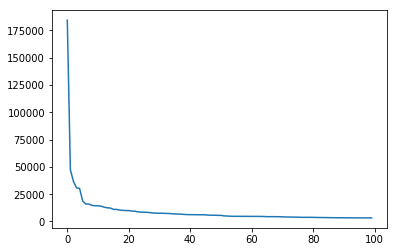

In [95]:
plt.plot(x, frequiences)

In [96]:
import numpy as np

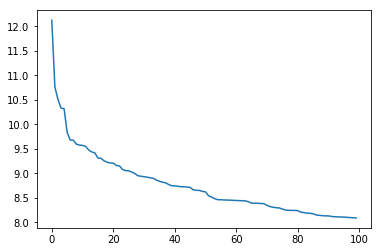

In [97]:
plt.plot(x, np.log(frequiences))

In [98]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [99]:
prob_1('我们')

0.001554473157589251

In [100]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [101]:
TOKEN = [str(t) for t in TOKEN]

In [102]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [103]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [104]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [105]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [106]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [107]:
prob_2('我们', '在')

4.683455274626447e-05

In [108]:
prob_2('在', '吃饭')

2.707199580708929e-07

In [109]:
prob_2('去', '吃饭')

2.707199580708929e-07

In [135]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    sentence_pro*=prob_1(words[-1])
    return sentence_pro

In [136]:
get_probablity('小明今天抽奖抽到一台苹果手机')

1.7204926926878847e-42

In [137]:
get_probablity('小明今天抽奖抽到一架波音飞机')

6.639413698863678e-44

In [138]:
get_probablity('洋葱奶昔来一杯')

1.074263591129832e-25

In [139]:
get_probablity('养乐多绿来一杯')

3.9681728631492946e-19

In [140]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 一个女人听着一个蓝色的女人 with Prb: 6.872297701437715e-46
sentence: 这个小小的桌子看见这个好看的女人 with Prb: 8.559247590105849e-49
sentence: 一个小小的小小的小猫坐在一个篮球 with Prb: 8.120759612414322e-44
sentence: 一个桌子看着一个女人 with Prb: 5.409337454868242e-31
sentence: 一个蓝色的小猫坐在一个小小的好看的蓝色的篮球 with Prb: 8.23011453375105e-72
sentence: 一个好看的小猫看见一个女人 with Prb: 8.721823709711131e-43
sentence: 这个蓝色的好看的桌子坐在一个桌子 with Prb: 7.148225479155566e-56
sentence: 这个好看的女人坐在这个桌子 with Prb: 8.8390525230137e-43
sentence: 一个好看的小小的好看的好看的篮球坐在一个好看的桌子 with Prb: 1.556432144470254e-85
sentence: 这个好看的蓝色的女人听着这个女人 with Prb: 9.274021348584957e-58


In [141]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 4.6160797040559013e-69
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.5925474978992858e-66
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.165130604664738e-38
---- 真是一只好看的小猫 with probility 7.997676344563261e-32
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.1279767706863237e-24
---- 今晚火锅去吃我 with probility 3.214716901001213e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.074263591129832e-25
---- 养乐多绿来一杯 with probility 3.9681728631492946e-19


## Data Driven

In [9]:
import random

In [12]:
random.choice([1,2,3,4])

4

'aos  bduo  awn'

In [26]:
from collections import Counter
a = Counter([1,2,3,4,5,2,3])

In [28]:
a.most_common()

[(2, 2), (3, 2), (1, 1), (4, 1), (5, 1)]